# 8. FX explanation of non-PPP-adjusted relationship

In [2]:
from IPython.display import display, HTML
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
import os

analysis_dir = os.getcwd()
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [3]:
log_cols = ['EI', 'EIb', 'EIc', 'P_GDP', 'P_GDPb', 'TI', 'FX']

In [4]:
%get data_dir --from em-2020
%get log_cols --from em-2020
suppressMessages({
library(data.table)
library(dplyr)
library(tseries)
library(plm)
library(feather)
library(forecast)
library(lavaan)
})
data.raw <- read.csv(file.path(data_dir, 'WB_BGD_current.csv'))


data.log <- copy(data.raw)
data.log[log_cols[log_cols != 'EIc']] <- log(data.raw[log_cols[log_cols != 'EIc']])

# data.logdiff <- diff(as.matrix(log(data.raw)))
data.logdiff <- cbind(data.raw[-1,'year', drop=FALSE], diff(as.matrix(subset(data.log, select=-year))))

data <- subset(data.raw, year >= 1991 & year <= 2014)
data.log <- subset(data.log, year >= 1991 & year <= 2014)
data.logdiff <- subset(data.logdiff, year >= 1991 & year <= 2014)

## P_GDP and EI are inversely related:

[1] -0.9008809


Call:
lm(formula = EI ~ P_GDP, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.056568 -0.010684  0.000512  0.009819  0.049400 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.021984   0.007371   2.983  0.00687 ** 
P_GDP       -0.929563   0.095490  -9.735 1.96e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02581 on 22 degrees of freedom
Multiple R-squared:  0.8116,	Adjusted R-squared:  0.803 
F-statistic: 94.76 on 1 and 22 DF,  p-value: 1.964e-09


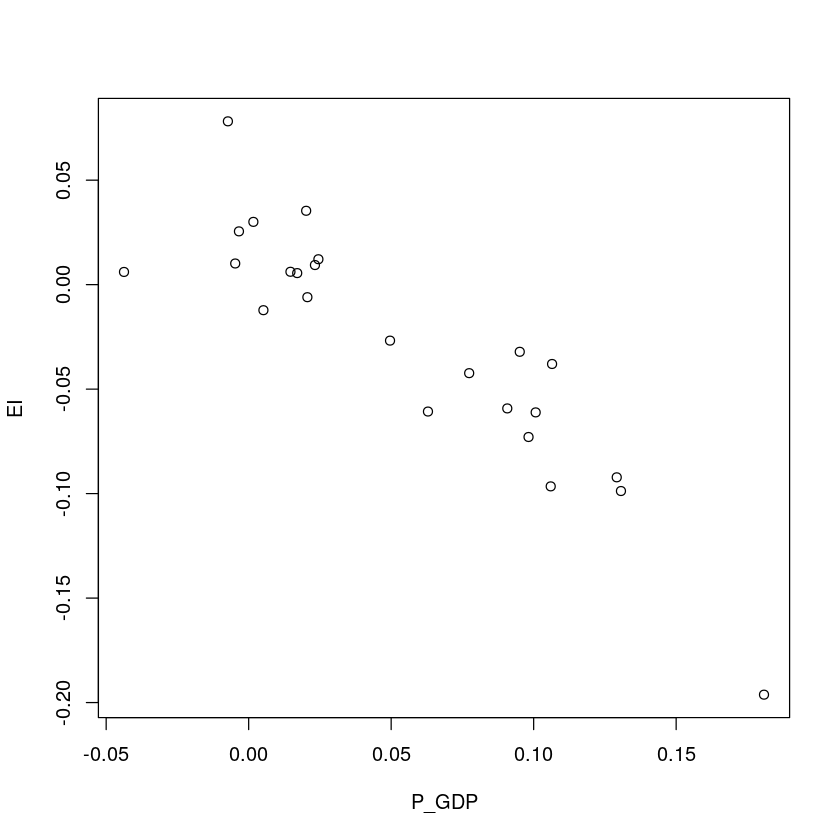

In [5]:
with(data.logdiff, {plot(P_GDP, EI); cor(P_GDP, EI, use="pairwise.complete.obs")})
summary(lm(EI ~ P_GDP, data=data.logdiff))

## but not with PPP-adjustment:

[1] -0.2582986


Call:
lm(formula = EIb ~ P_GDPb, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.057386 -0.011963  0.002672  0.011632  0.046687 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.004676   0.020418  -0.229    0.821
P_GDPb      -0.448822   0.357888  -1.254    0.223

Residual standard error: 0.02482 on 22 degrees of freedom
Multiple R-squared:  0.06672,	Adjusted R-squared:  0.0243 
F-statistic: 1.573 on 1 and 22 DF,  p-value: 0.223


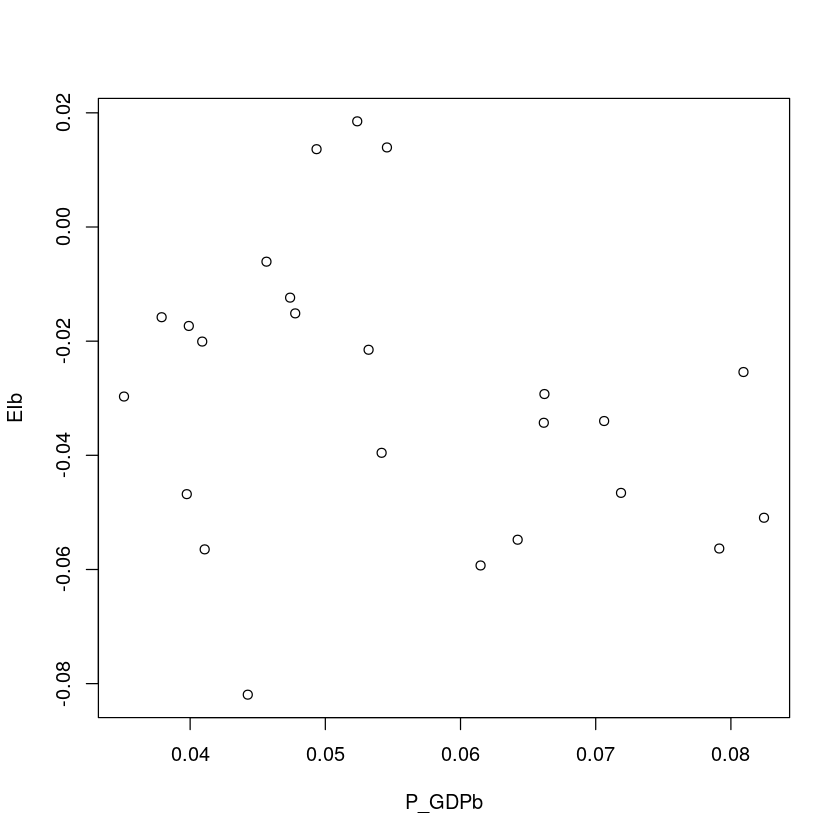

In [6]:
with(data.logdiff, {plot(P_GDPb, EIb); cor(P_GDPb, EIb, use="pairwise.complete.obs")})
summary(lm(EIb ~ P_GDPb, data=data.logdiff))

## but both are strongly correlated with FX:

[1] -0.5656872

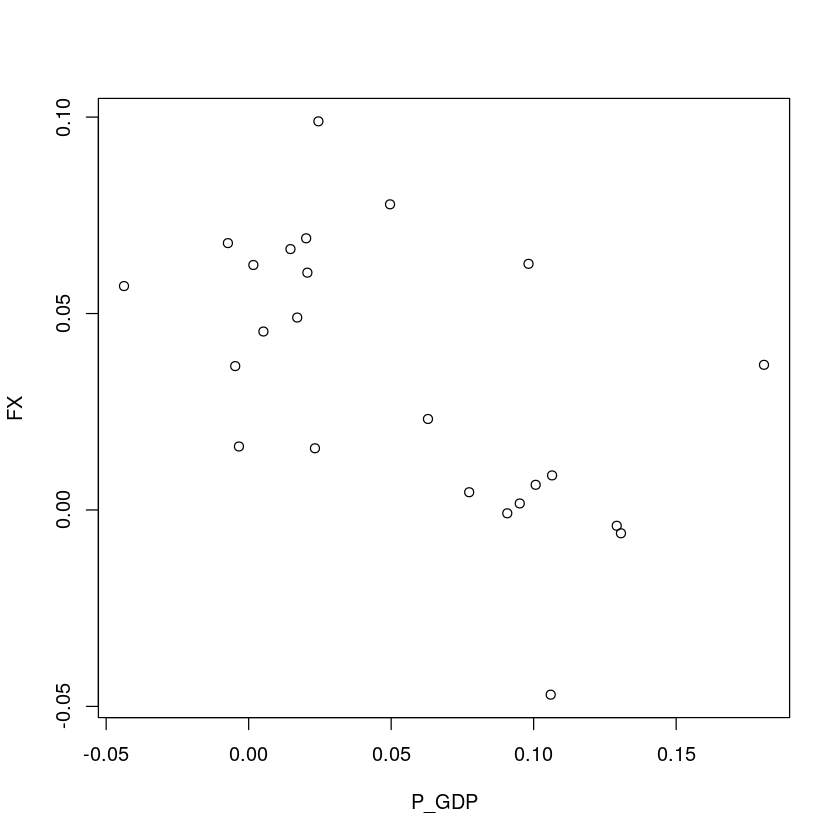

[1] 0.5161485

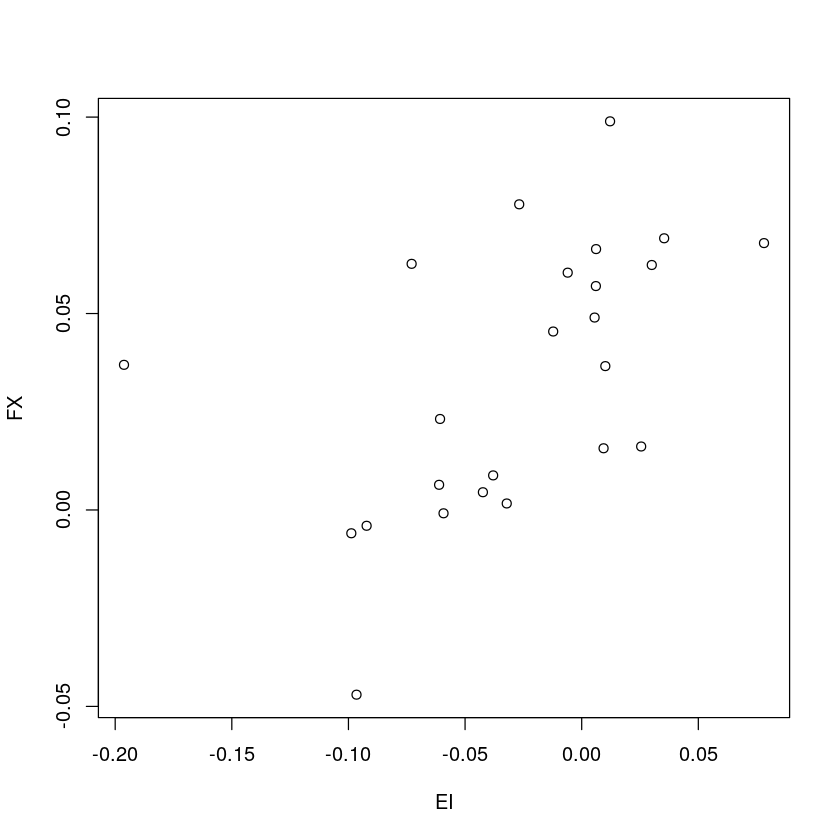

In [7]:
with(data.logdiff, {plot(P_GDP, FX); cor(P_GDP, FX, use="pairwise.complete.obs")})
with(data.logdiff, {plot(EI, FX); cor(EI, FX, use="pairwise.complete.obs")})

## coefficients of FX for both non-PPP-adjusted measures are significant:

In [8]:
ei.fx.lm <- lm(EI ~ FX, data=data.logdiff)
summary(ei.fx.lm)
pgdp.fx.lm <- lm(P_GDP ~ FX, data=data.logdiff)
summary(pgdp.fx.lm)


Call:
lm(formula = EI ~ FX, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.170819 -0.017885  0.005963  0.026069  0.076756 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.05736    0.01465  -3.916 0.000739 ***
FX           0.86505    0.30604   2.827 0.009824 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05093 on 22 degrees of freedom
Multiple R-squared:  0.2664,	Adjusted R-squared:  0.2331 
F-statistic: 7.989 on 1 and 22 DF,  p-value: 0.009824



Call:
lm(formula = P_GDP ~ FX, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076338 -0.026970 -0.002344  0.029790  0.129808 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.08496    0.01367   6.217 2.95e-06 ***
FX          -0.91882    0.28556  -3.218  0.00396 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04752 on 22 degrees of freedom
Multiple R-squared:   0.32,	Adjusted R-squared:  0.2891 
F-statistic: 10.35 on 1 and 22 DF,  p-value: 0.003964


## FX explains the residuals of the relationship between EI and P_GDPb:


Call:
lm(formula = EI ~ P_GDPb, data = data.logdiff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17635 -0.03041  0.01114  0.02916  0.10465 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.00421    0.04839   0.087    0.931
P_GDPb      -0.58637    0.84811  -0.691    0.497

Residual standard error: 0.05882 on 22 degrees of freedom
Multiple R-squared:  0.02127,	Adjusted R-squared:  -0.02322 
F-statistic: 0.478 on 1 and 22 DF,  p-value: 0.4966


[1] 0.5290807

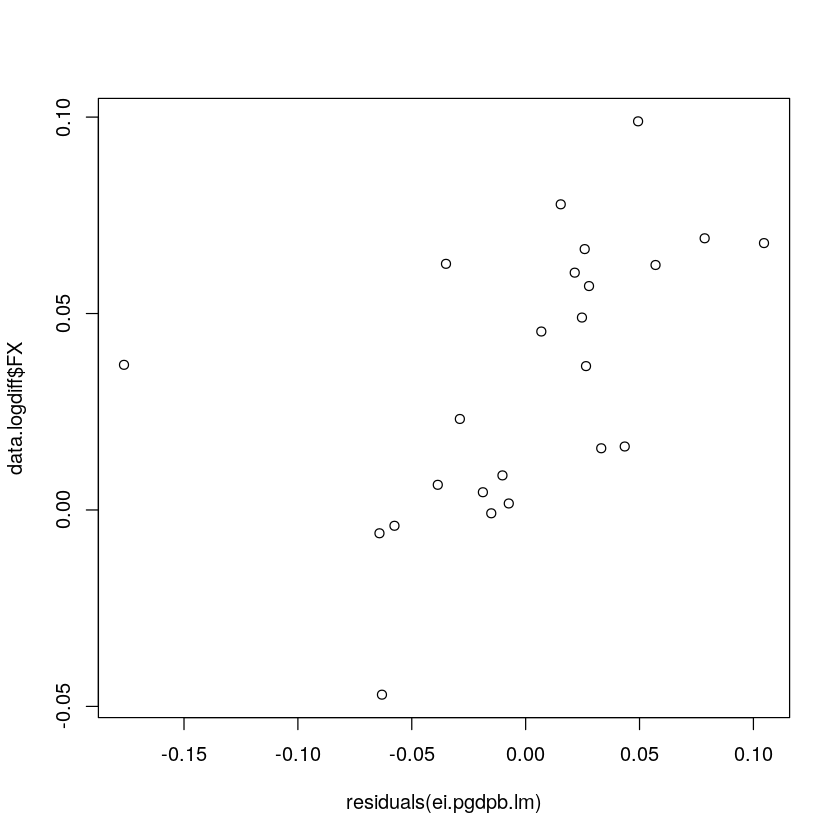

In [11]:
ei.pgdpb.lm <- lm(EI ~ P_GDPb, data=data.logdiff)
summary(ei.pgdpb.lm)
cor(residuals(ei.pgdpb.lm), data.logdiff$FX)
plot(residuals(ei.pgdpb.lm), data.logdiff$FX)

## but even after removing FX fluctuations, EI and P_GDP are related
(in a way that EIb and P_GDPb are not)


Call:
lm(formula = residuals(ei.fx.lm) ~ residuals(pgdp.fx.lm), data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.056394 -0.010796  0.000919  0.009778  0.049193 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -6.371e-18  5.267e-03    0.00        1    
residuals(pgdp.fx.lm) -9.240e-01  1.158e-01   -7.98 6.15e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0258 on 22 degrees of freedom
Multiple R-squared:  0.7432,	Adjusted R-squared:  0.7316 
F-statistic: 63.69 on 1 and 22 DF,  p-value: 6.149e-08


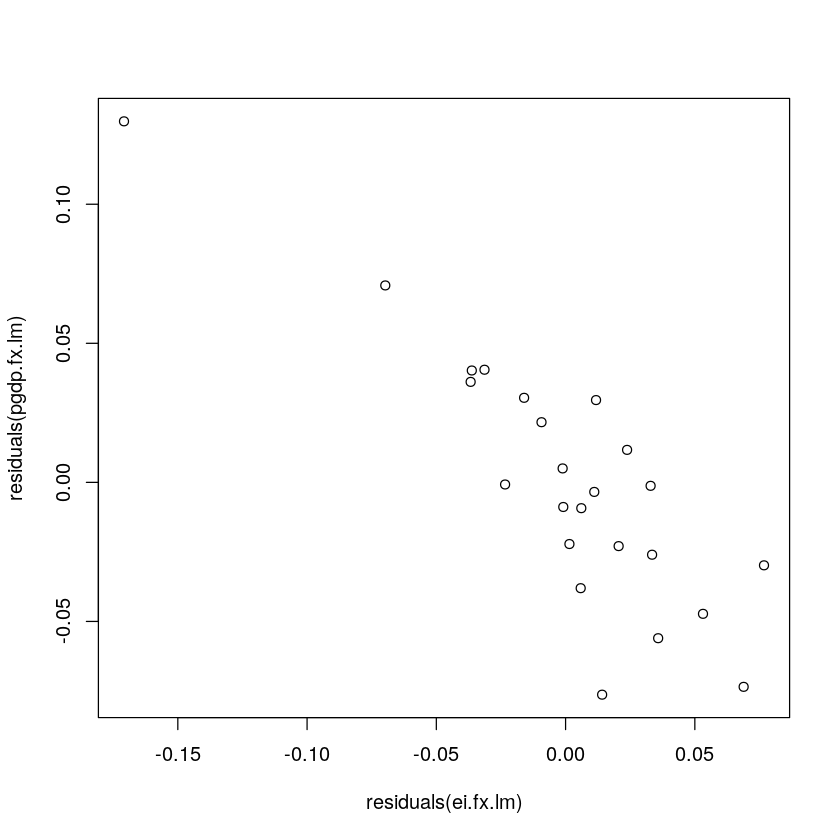

In [13]:
summary(lm(residuals(ei.fx.lm) ~ residuals(pgdp.fx.lm), data=data.logdiff))
plot(residuals(ei.fx.lm), residuals(pgdp.fx.lm))